# PCA Experiments

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA

## Standard (Linear) PCA

In [0]:
digit_data = datasets.load_digits()


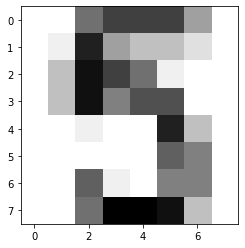

In [0]:
plt.imshow(digit_data.data[1010].reshape((8,8))*-1, cmap='gray')


In [0]:
digit_data.target[1010]

5

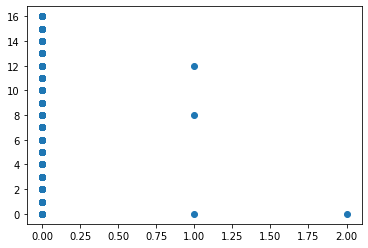

In [0]:
plt.scatter(digit_data.data[:,16],digit_data.data[:,45])

In [0]:
p = PCA()

In [0]:
p.fit(digit_data.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)


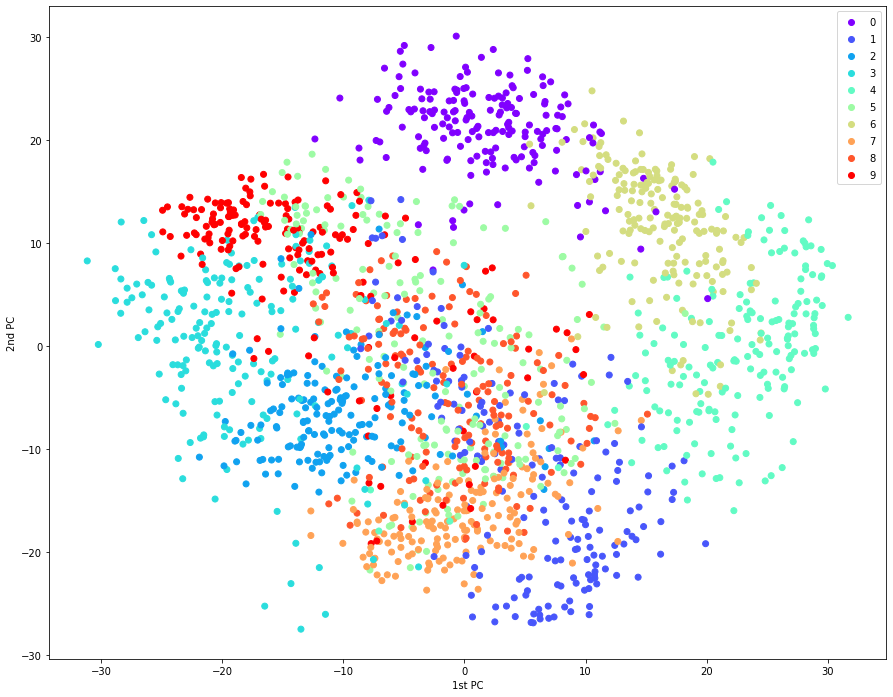

In [0]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes()
scatter = ax.scatter(p.transform(digit_data.data)[:,0], p.transform(digit_data.data)[:,1], c=digit_data.target, cmap="rainbow")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.legend(*scatter.legend_elements())

## Kernel PCA

In [0]:
def make_shell(num_points=100, dimensions=2, radius=1.0, thickness=0.1):
  points = []  # accepted points
  while len(points) < num_points:
    point = (2*np.random.random(size=dimensions) - 1)*radius
    dist_from_origin = np.sqrt(np.sum(point ** 2))
    if dist_from_origin < radius and dist_from_origin > radius - thickness:
      points.append(point)
  return np.array(points)

In [0]:
d = 20

data = np.concatenate((make_shell(num_points=1000, dimensions=d),
                       make_shell(num_points=1000, radius=0.5, dimensions=d),
                       make_shell(num_points=1000, radius=0.1, dimensions=d)), axis=0)
target = [1]*1000 + [2]*1000 + [3]*1000

KeyboardInterrupt: ignored

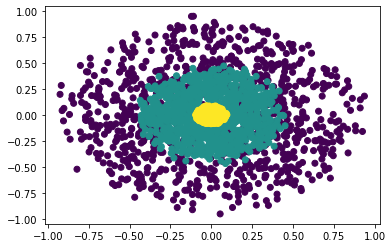

In [0]:
plt.scatter(data[:,0],data[:,1], c=target)

$1/2\sigma^2 = \gamma$

In [0]:
p = KernelPCA(kernel='rbf', gamma=1).fit(data)  

Text(0, 0.5, '2nd PC')

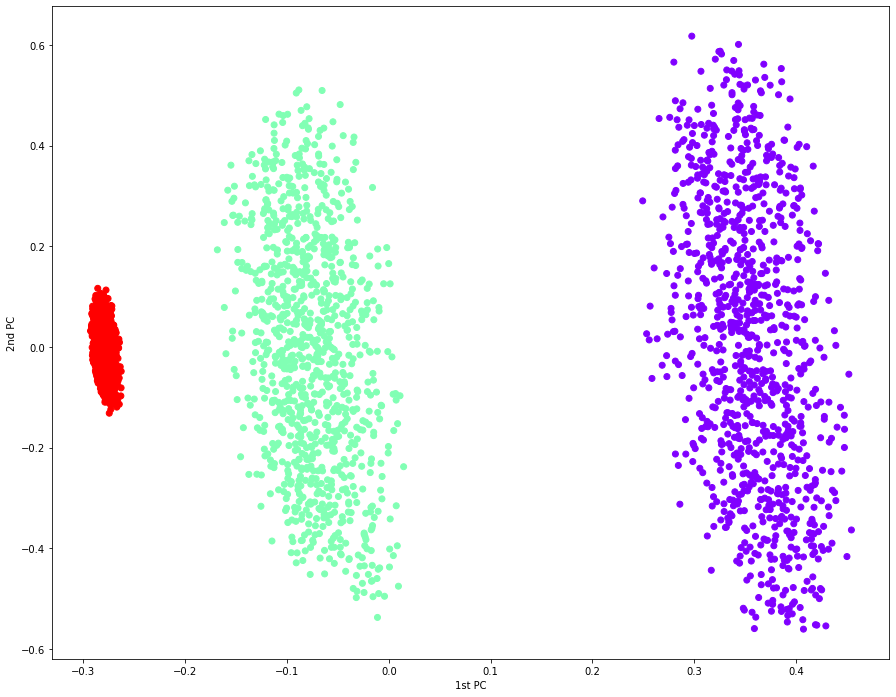

In [0]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes()
ax.scatter(p.transform(data)[:,0], p.transform(data)[:,1], c=target, cmap="rainbow")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
